In [1]:
import numpy as np
import sys, os, git
from matplotlib import pyplot as plt

In [2]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/pullonPEG/"
print("data path: ", data_path)

level: level2 & tutorial name: polymer-in-water
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level2/polymer-in-water/pullonPEG/


In [3]:
time, distance = np.loadtxt(data_path + "end-to-end-distance.dat").T
time /= 1000 # ps

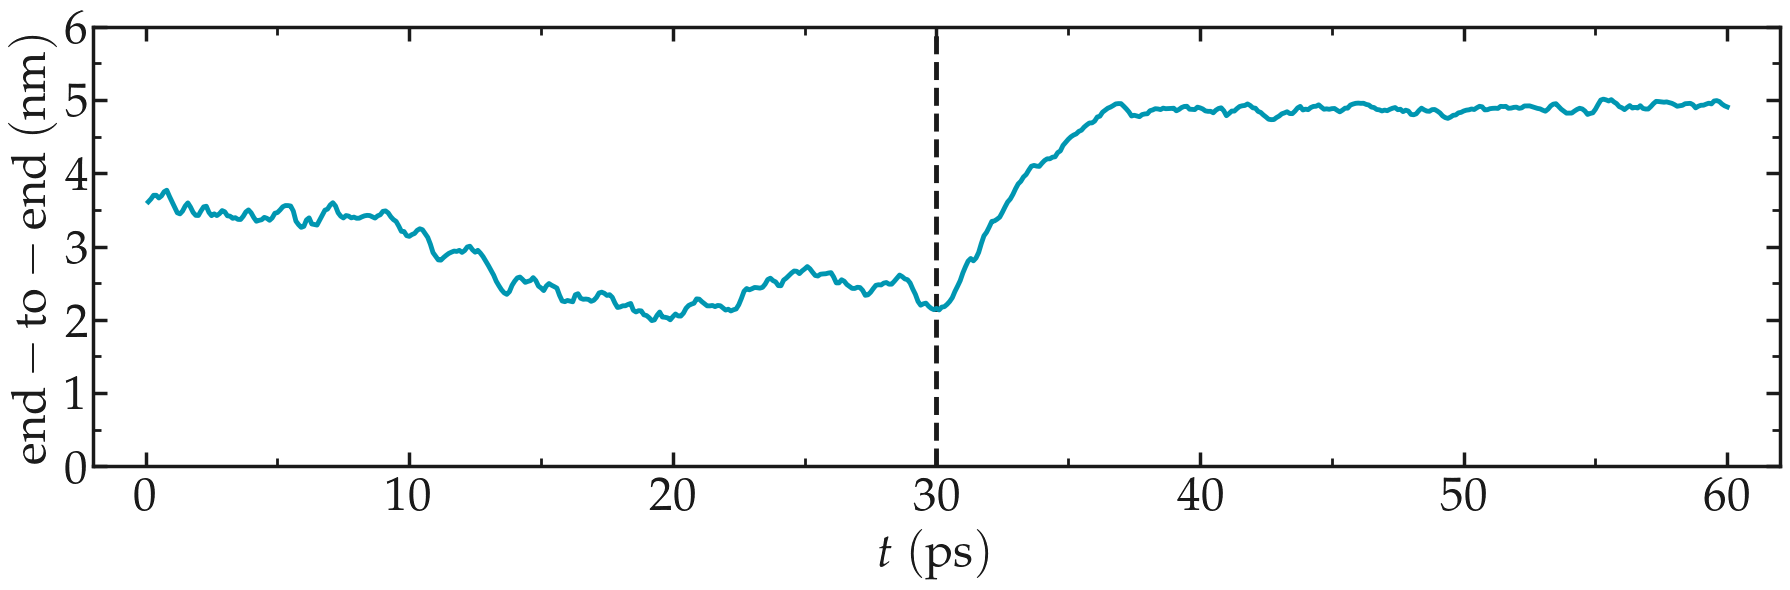

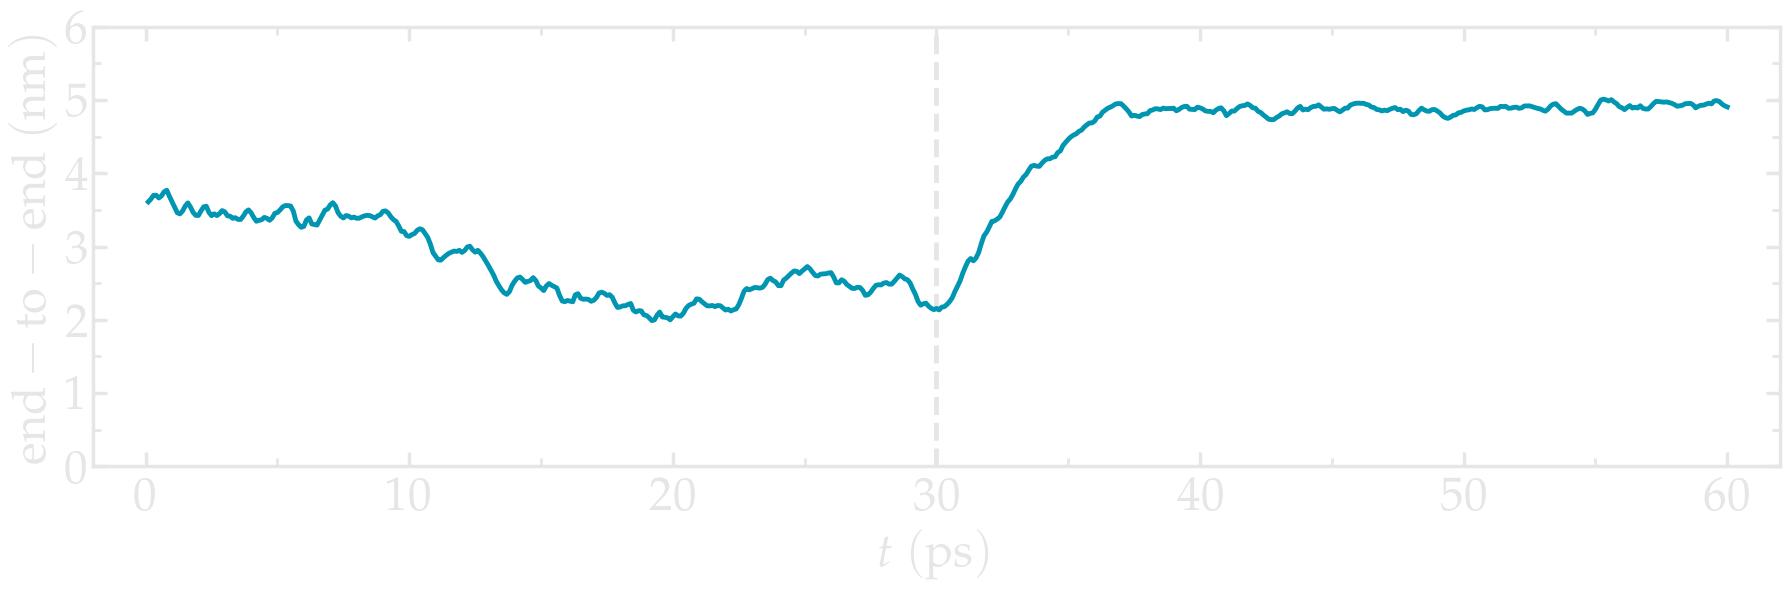

In [9]:
filename = "distance"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,6))
    ax, n, l_tot, c_tot = [], 0, 1, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    x = np.arange(0, 60, 0.1)
    ax[-1].plot(x*0 + 30, x, '--', color=mygray, linewidth=3.5)
    ax[-1].plot(time, distance/10, color=colors["myblue"], linewidth=3.5)
    complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$',
                   r'$\mathrm{end-to-end ~ (nm)}$',
                   legend=False, axis_color=mygray, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(0, 70, 10), y_ticks=np.arange(0, 7, 1),
                   x_boundaries=(-2, 62), y_boundaries=(0, 6))
    save_figure(plt, fig, mode, git_path, path_figures, filename)

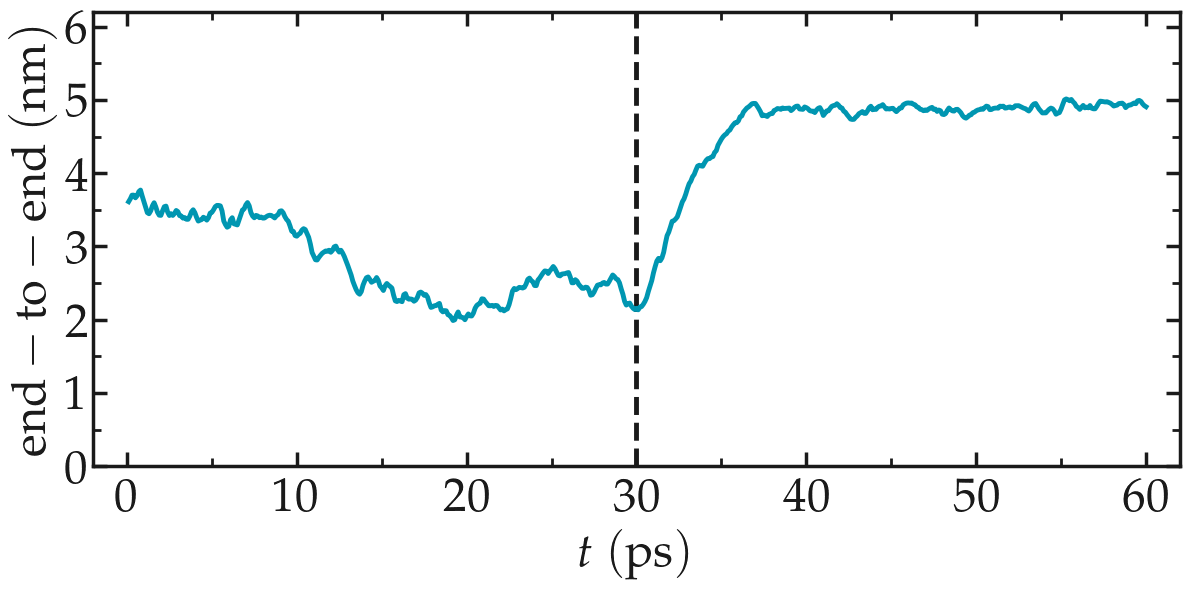

In [11]:
filename = "distance-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = True, desired_figsize=(12,6))
ax, n, l_tot, c_tot = [], 0, 1, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
x = np.arange(0, 60, 0.1)
ax[-1].plot(x*0 + 30, x, '--', color=mygray, linewidth=3.5)
ax[-1].plot(time, distance/10, color=colors["myblue"], linewidth=3.5)
complete_panel(ax[-1], r'$t ~ \mathrm{(ps)}$',
                r'$\mathrm{end-to-end ~ (nm)}$',
                legend=False, axis_color=mygray, xpad=8)
set_boundaries(plt, x_ticks=np.arange(0, 70, 10), y_ticks=np.arange(0, 7, 1),
                x_boundaries=(-2, 62), y_boundaries=(0, 6.2))
save_figure(plt, fig, mode, git_path, path_figures, filename)